In [1]:
from scipy.special import jn, jn_zeros
from scipy.interpolate import interp1d
from hankel_transform import *
rc('text', usetex=False)

In [2]:
j_nu=0
rmin=.1
rmax=100.

kmin=.1
kmax=100.

n_zeros=50000

In [3]:
#Setting up the Hankel Transform
#This part is slower. But only needs to be run once. 
#If you only need wgg, set j_nu=[0]. For wg+ (or \Delta\Sigma) use j_nu=[2]
%time HT=hankel_transform(rmin=rmin,rmax=rmax,kmax=kmax,j_nu=[j_nu],n_zeros=n_zeros,kmin=kmin,prune_r=2)
%time HT_inv=hankel_transform(rmin=kmin,rmax=kmax,kmax=rmax,j_nu=[j_nu],n_zeros=n_zeros,kmin=rmin,prune_r=2)

pruning r, log_space,n_f: True 2
pruned r: 747
nr: 747
CPU times: user 10 s, sys: 160 ms, total: 10.2 s
Wall time: 10.2 s
pruning r, log_space,n_f: True 2
pruned r: 747
nr: 747
CPU times: user 10.2 s, sys: 95.3 ms, total: 10.3 s
Wall time: 10.3 s


In [8]:
HT.kmax

100.0

In [9]:
f=1./HT.r[j_nu]
k_test,g=HT_inv.projected_correlation(k_pk=HT.r[j_nu],pk=f,j_nu=j_nu)
g*=HT.rmax**2/HT.kmax**2
g*=(2*np.pi)**2
r_test,f2=HT.projected_correlation(k_pk=k_test,pk=g,j_nu=j_nu)


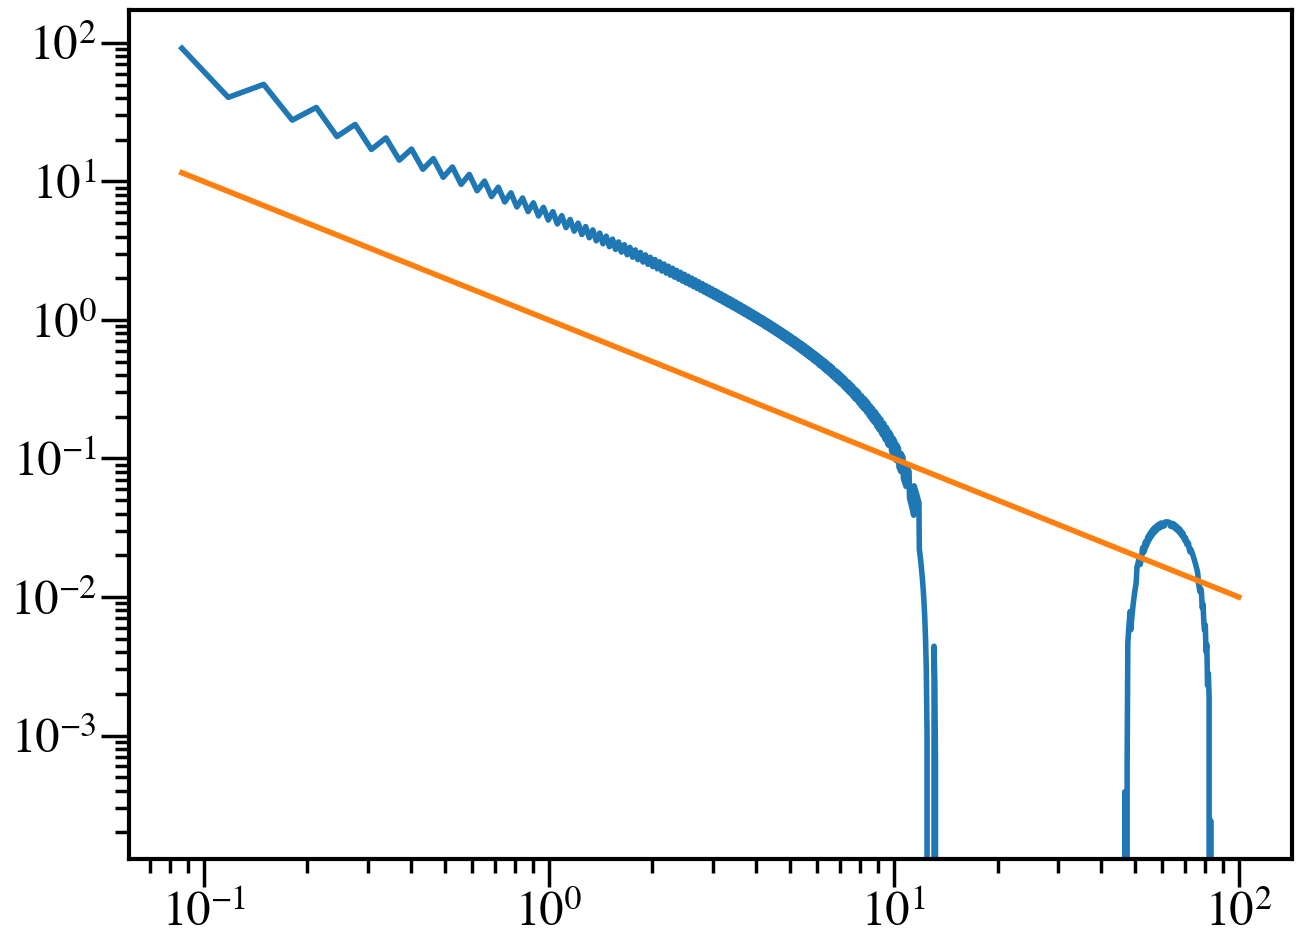

In [10]:
loglog(k_test,g)
loglog(k_test,1./k_test)

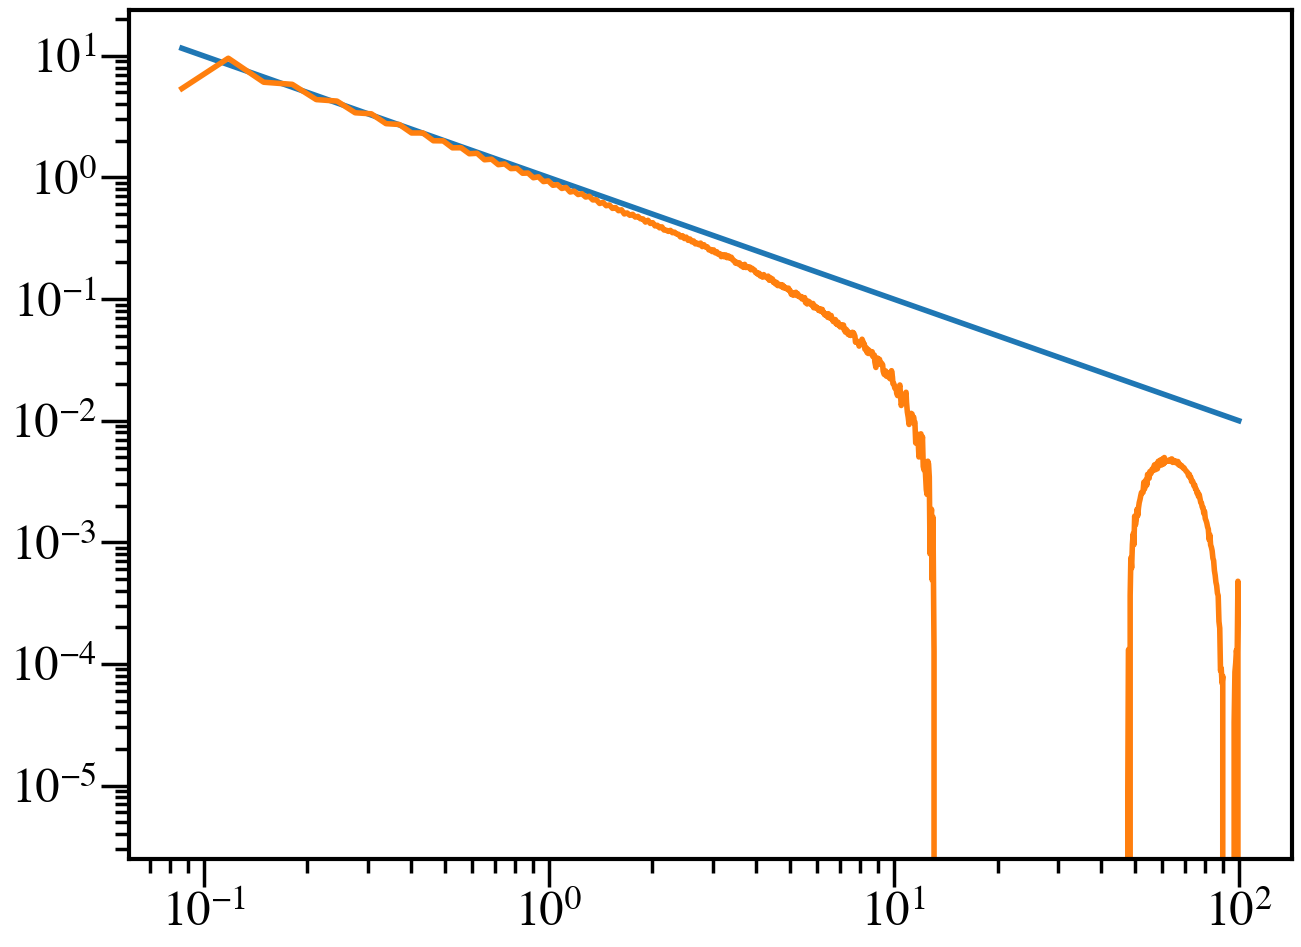

In [11]:
loglog(r_test,f)
loglog(r_test,f2)
# plot(r_test[1:-1],f2[1:-1]/f[1:-1])
# plot(r_test,f2/f)